In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
import pandas as pd
df = pd.read_csv('hepatitis_csv.csv')
df.head(10)

,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology,class
0,30,male,False,False,False,False,False,False,False,False,False,False,False,1.0,85.0,18.0,4.0,NaN,False,live
1,50,female,False,False,True,False,False,False,False,False,False,False,False,0.9,135.0,42.0,3.5,NaN,False,live
2,78,female,True,False,True,False,False,True,False,False,False,False,False,0.7,96.0,32.0,4.0,NaN,False,live
3,31,female,NaN,True,False,False,False,True,False,False,False,False,False,0.7,46.0,52.0,4.0,80.0,False,live
4,34,female,True,False,False,False,False,True,False,False,False,False,False,1.0,NaN,200.0,4.0,NaN,False,live
5,34,female,True,False,False,False,False,True,False,False,False,False,False,0.9,95.0,28.0,4.0,75.0,False,live
6,51,female,False,False,True,False,True,True,False,True,True,False,False,NaN,NaN,NaN,NaN,NaN,False,die
7,23,female,True,False,False,False,False,True,False,False,False,False,False,1.0,NaN,NaN,NaN,NaN,False,live
8,39,female,True,False,True,False,False,True,True,False,False,False,False,0.7,NaN,48.0,4.4,NaN,False,live
9,30,female,True,False,False,False,False,True,False,False,False,False,False,1.0,NaN,120.0,3.9,NaN,False,live


# Identify missing values

In [5]:
data = df.copy()

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              155 non-null    int64  
 1   sex              155 non-null    object 
 2   steroid          154 non-null    object 
 3   antivirals       155 non-null    bool   
 4   fatigue          154 non-null    object 
 5   malaise          154 non-null    object 
 6   anorexia         154 non-null    object 
 7   liver_big        145 non-null    object 
 8   liver_firm       144 non-null    object 
 9   spleen_palpable  150 non-null    object 
 10  spiders          150 non-null    object 
 11  ascites          150 non-null    object 
 12  varices          150 non-null    object 
 13  bilirubin        149 non-null    float64
 14  alk_phosphate    126 non-null    float64
 15  sgot             151 non-null    float64
 16  albumin          139 non-null    float64
 17  protime         

In [7]:
data.describe()

,age,bilirubin,alk_phosphate,sgot,albumin,protime
count,155.000000,149.000000,126.000000,151.00000,139.000000,88.000000
mean,41.200000,1.427517,105.325397,85.89404,3.817266,61.852273
std,12.565878,1.212149,51.508109,89.65089,0.651523,22.875244
min,7.000000,0.300000,26.000000,14.00000,2.100000,0.000000
25%,32.000000,0.700000,74.250000,31.50000,3.400000,46.000000
50%,39.000000,1.000000,85.000000,58.00000,4.000000,61.000000
75%,50.000000,1.500000,132.250000,100.50000,4.200000,76.250000
max,78.000000,8.000000,295.000000,648.00000,6.400000,100.000000


In [8]:
data.describe(include='object')

,sex,steroid,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,class
count,155,154,154,154,154,145,144,150,150,150,150,155
unique,2,2,2,2,2,2,2,2,2,2,2,2
top,female,True,True,False,False,True,False,False,False,False,False,live
freq,139,78,100,93,122,120,84,120,99,130,132,123


In [9]:
data.isna().sum()

,0
age,0
sex,0
steroid,1
antivirals,0
fatigue,1
malaise,1
anorexia,1
liver_big,10
liver_firm,11
spleen_palpable,5


In [10]:
missing_val = data.isna().sum()/len(data)*100
missing_val

,0
age,0.000000
sex,0.000000
steroid,0.645161
antivirals,0.000000
fatigue,0.645161
malaise,0.645161
anorexia,0.645161
liver_big,6.451613
liver_firm,7.096774
spleen_palpable,3.225806


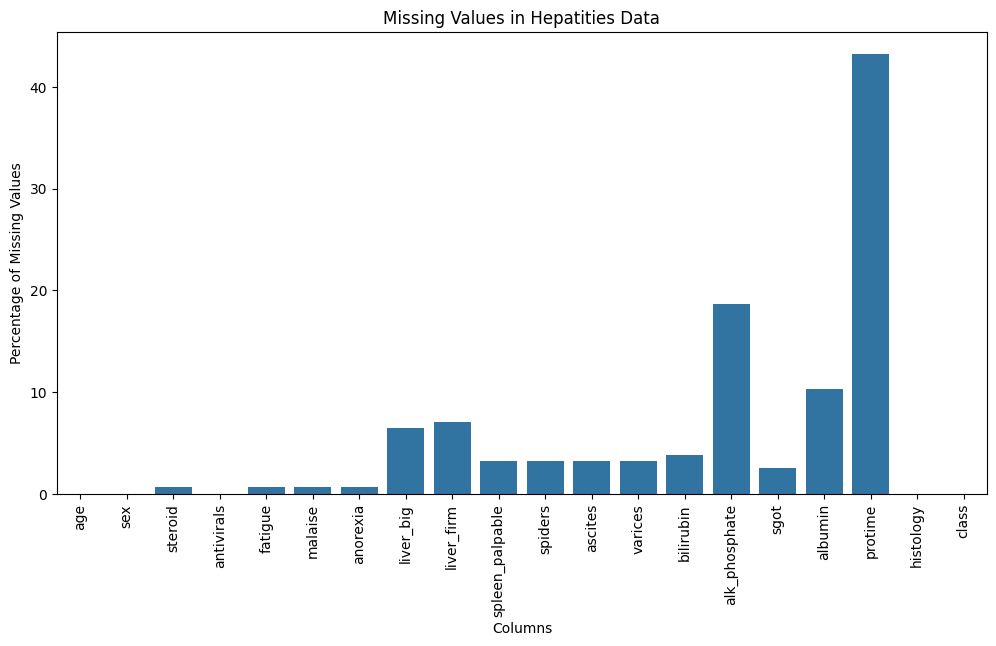

In [11]:
# Calculate the percentage of missing values for each column
missing_val = data.isna().sum() / len(data) * 100

# Create a bar plot of the missing values
plt.figure(figsize=(12, 6))
sns.barplot(x=missing_val.index, y=missing_val.values)
plt.xticks(rotation=90)
plt.xlabel('Columns')
plt.ylabel('Percentage of Missing Values')
data = pd.read_csv('/content/hepatitis_csv.csv')
plt.title('Missing Values in Hepatities Data')
plt.show()


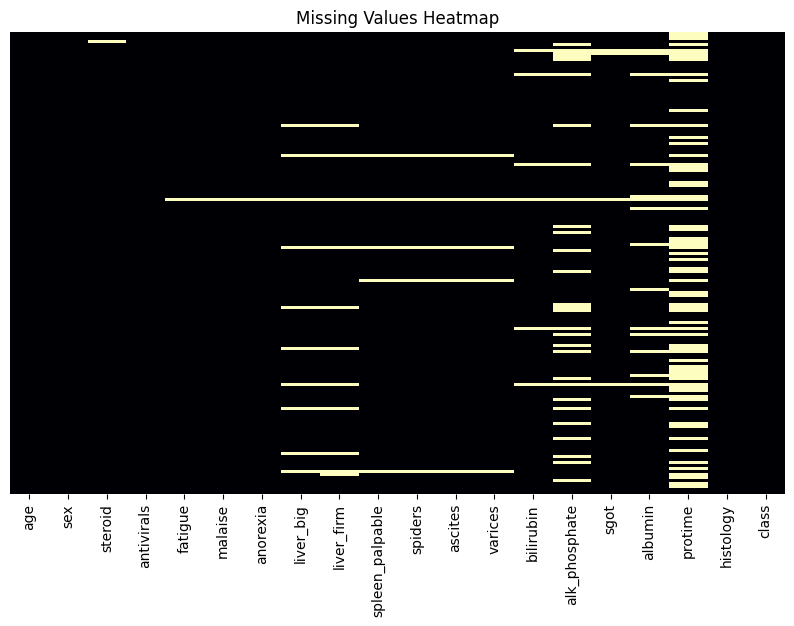

In [12]:
#Heatmap to see the missing values
plt.figure(figsize=(10, 6))
sns.heatmap(data.isnull(), cmap='magma', cbar=False, yticklabels=False)
plt.title('Missing Values Heatmap')
plt.show()

In [13]:
data.head()

,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology,class
0,30,male,False,False,False,False,False,False,False,False,False,False,False,1.0,85.0,18.0,4.0,NaN,False,live
1,50,female,False,False,True,False,False,False,False,False,False,False,False,0.9,135.0,42.0,3.5,NaN,False,live
2,78,female,True,False,True,False,False,True,False,False,False,False,False,0.7,96.0,32.0,4.0,NaN,False,live
3,31,female,NaN,True,False,False,False,True,False,False,False,False,False,0.7,46.0,52.0,4.0,80.0,False,live
4,34,female,True,False,False,False,False,True,False,False,False,False,False,1.0,NaN,200.0,4.0,NaN,False,live


In [14]:
data.dropna(axis=1)

,age,sex,antivirals,histology,class
0,30,male,False,False,live
1,50,female,False,False,live
2,78,female,False,False,live
3,31,female,True,False,live
4,34,female,False,False,live
...,...,...,...,...,...
150,46,female,False,True,die
151,44,female,False,True,live
152,61,female,False,True,live
153,53,male,False,True,live


In [15]:
data.dropna(subset=['liver_big'],axis=0,inplace=True)

In [16]:
data.isna().sum()/len(data)*100

,0
age,0.000000
sex,0.000000
steroid,0.689655
antivirals,0.000000
fatigue,0.000000
malaise,0.000000
anorexia,0.000000
liver_big,0.000000
liver_firm,0.689655
spleen_palpable,0.689655


In [17]:
data.dropna(thresh=0.8*len(data),axis=1,inplace=True)

In [18]:
data.dtypes

,0
age,int64
sex,object
steroid,object
antivirals,bool
fatigue,object
malaise,object
anorexia,object
liver_big,object
liver_firm,object
spleen_palpable,object


In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 145 entries, 0 to 154
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              145 non-null    int64  
 1   sex              145 non-null    object 
 2   steroid          144 non-null    object 
 3   antivirals       145 non-null    bool   
 4   fatigue          145 non-null    object 
 5   malaise          145 non-null    object 
 6   anorexia         145 non-null    object 
 7   liver_big        145 non-null    object 
 8   liver_firm       144 non-null    object 
 9   spleen_palpable  144 non-null    object 
 10  spiders          144 non-null    object 
 11  ascites          144 non-null    object 
 12  varices          144 non-null    object 
 13  bilirubin        141 non-null    float64
 14  alk_phosphate    121 non-null    float64
 15  sgot             143 non-null    float64
 16  albumin          132 non-null    float64
 17  histology        145 

Numeric columns

In [20]:
import numpy as np
numeric = data.select_dtypes(include=np.number)
numeric_columns = numeric.columns
numeric_columns

Index(['age', 'bilirubin', 'alk_phosphate', 'sgot', 'albumin'], dtype='object')

In [21]:
data[numeric_columns] = data[numeric_columns].fillna(data[numeric_columns].mean())
data[numeric_columns]

,age,bilirubin,alk_phosphate,sgot,albumin
0,30,1.0,85.000000,18.0,4.0
1,50,0.9,135.000000,42.0,3.5
2,78,0.7,96.000000,32.0,4.0
3,31,0.7,46.000000,52.0,4.0
4,34,1.0,105.553719,200.0,4.0
...,...,...,...,...,...
150,46,7.6,105.553719,242.0,3.3
151,44,0.9,126.000000,142.0,4.3
152,61,0.8,75.000000,20.0,4.1
153,53,1.5,81.000000,19.0,4.1


In [22]:
data.isna().sum()/len(data)*100

,0
age,0.000000
sex,0.000000
steroid,0.689655
antivirals,0.000000
fatigue,0.000000
malaise,0.000000
anorexia,0.000000
liver_big,0.000000
liver_firm,0.689655
spleen_palpable,0.689655


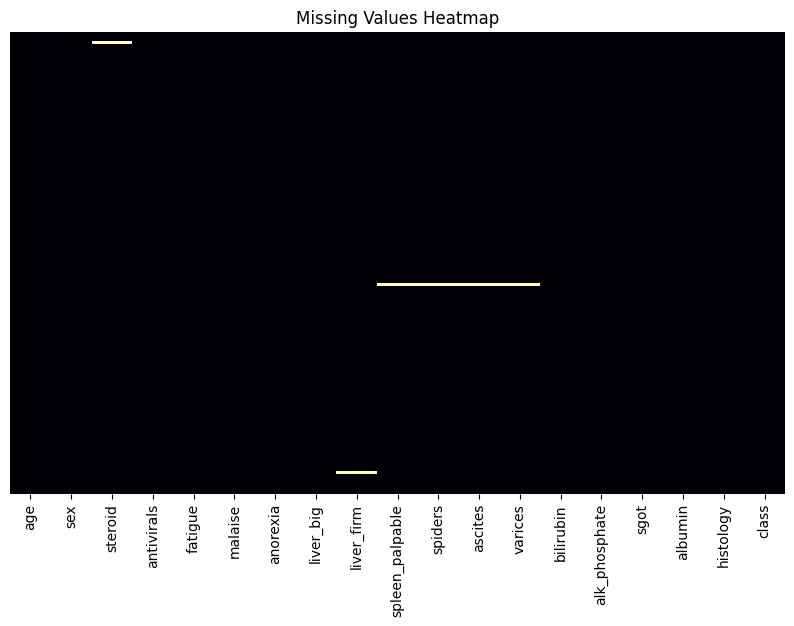

In [23]:
#Heatmap to see the missing values
plt.figure(figsize=(10, 6))
sns.heatmap(data.isnull(), cmap='magma', cbar=False, yticklabels=False)
plt.title('Missing Values Heatmap')
plt.show()

In [24]:
data

,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,histology,class
0,30,male,False,False,False,False,False,False,False,False,False,False,False,1.0,85.000000,18.0,4.0,False,live
1,50,female,False,False,True,False,False,False,False,False,False,False,False,0.9,135.000000,42.0,3.5,False,live
2,78,female,True,False,True,False,False,True,False,False,False,False,False,0.7,96.000000,32.0,4.0,False,live
3,31,female,NaN,True,False,False,False,True,False,False,False,False,False,0.7,46.000000,52.0,4.0,False,live
4,34,female,True,False,False,False,False,True,False,False,False,False,False,1.0,105.553719,200.0,4.0,False,live
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,46,female,True,False,True,True,True,True,False,False,True,True,True,7.6,105.553719,242.0,3.3,True,die
151,44,female,True,False,True,False,False,True,True,False,False,False,False,0.9,126.000000,142.0,4.3,True,live
152,61,female,False,False,True,True,False,False,True,False,True,False,False,0.8,75.000000,20.0,4.1,True,live
153,53,male,False,False,True,False,False,True,False,True,True,False,True,1.5,81.000000,19.0,4.1,True,live


Categorial columns

In [25]:
boolean_columns = data.select_dtypes(include=object).columns.tolist()  # Use built-in object type
boolean_columns.remove('class')
data[boolean_columns] = data[boolean_columns].astype('bool')


In [26]:
data[boolean_columns].fillna(df.mode())

,sex,steroid,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices
0,True,False,False,False,False,False,False,False,False,False,False
1,True,False,True,False,False,False,False,False,False,False,False
2,True,True,True,False,False,True,False,False,False,False,False
3,True,True,False,False,False,True,False,False,False,False,False
4,True,True,False,False,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
150,True,True,True,True,True,True,False,False,True,True,True
151,True,True,True,False,False,True,True,False,False,False,False
152,True,False,True,True,False,False,True,False,True,False,False
153,True,False,True,False,False,True,False,True,True,False,True


In [27]:
data.isna().sum()/len(data)*100

,0
age,0.0
sex,0.0
steroid,0.0
antivirals,0.0
fatigue,0.0
malaise,0.0
anorexia,0.0
liver_big,0.0
liver_firm,0.0
spleen_palpable,0.0


Interpolation

In [28]:
data = pd.read_csv('hepatitis_csv.csv')
data.isna().sum()/len(data)*100

numeric = data.select_dtypes(include=np.number)
numeric_columns = numeric.columns
data.head(10)


,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology,class
0,30,male,False,False,False,False,False,False,False,False,False,False,False,1.0,85.0,18.0,4.0,NaN,False,live
1,50,female,False,False,True,False,False,False,False,False,False,False,False,0.9,135.0,42.0,3.5,NaN,False,live
2,78,female,True,False,True,False,False,True,False,False,False,False,False,0.7,96.0,32.0,4.0,NaN,False,live
3,31,female,NaN,True,False,False,False,True,False,False,False,False,False,0.7,46.0,52.0,4.0,80.0,False,live
4,34,female,True,False,False,False,False,True,False,False,False,False,False,1.0,NaN,200.0,4.0,NaN,False,live
5,34,female,True,False,False,False,False,True,False,False,False,False,False,0.9,95.0,28.0,4.0,75.0,False,live
6,51,female,False,False,True,False,True,True,False,True,True,False,False,NaN,NaN,NaN,NaN,NaN,False,die
7,23,female,True,False,False,False,False,True,False,False,False,False,False,1.0,NaN,NaN,NaN,NaN,False,live
8,39,female,True,False,True,False,False,True,True,False,False,False,False,0.7,NaN,48.0,4.4,NaN,False,live
9,30,female,True,False,False,False,False,True,False,False,False,False,False,1.0,NaN,120.0,3.9,NaN,False,live


In [29]:
data[numeric_columns] = data[numeric_columns].interpolate(method ='linear', limit_direction ='forward')
data.head(10)


,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology,class
0,30,male,False,False,False,False,False,False,False,False,False,False,False,1.00,85.0,18.000000,4.000000,NaN,False,live
1,50,female,False,False,True,False,False,False,False,False,False,False,False,0.90,135.0,42.000000,3.500000,NaN,False,live
2,78,female,True,False,True,False,False,True,False,False,False,False,False,0.70,96.0,32.000000,4.000000,NaN,False,live
3,31,female,NaN,True,False,False,False,True,False,False,False,False,False,0.70,46.0,52.000000,4.000000,80.0,False,live
4,34,female,True,False,False,False,False,True,False,False,False,False,False,1.00,70.5,200.000000,4.000000,77.5,False,live
5,34,female,True,False,False,False,False,True,False,False,False,False,False,0.90,95.0,28.000000,4.000000,75.0,False,live
6,51,female,False,False,True,False,True,True,False,True,True,False,False,0.95,91.6,34.666667,4.133333,77.0,False,die
7,23,female,True,False,False,False,False,True,False,False,False,False,False,1.00,88.2,41.333333,4.266667,79.0,False,live
8,39,female,True,False,True,False,False,True,True,False,False,False,False,0.70,84.8,48.000000,4.400000,81.0,False,live
9,30,female,True,False,False,False,False,True,False,False,False,False,False,1.00,81.4,120.000000,3.900000,83.0,False,live
